In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import wbgapi as wb
import pandas_datareader.data as web
from src.utils import apply_matplotlib_settings
from src.quant.business_cycles.utils import plot_growth

apply_matplotlib_settings()

In [2]:
# Set graphical parameters
cycler = plt.cycler(
    linestyle=["-", "-.", "--", ":"],
    color=["#377eb8", "#ff7f00", "#4daf4a", "#ff334f"],
)
plt.rc("axes", prop_cycle=cycler)

In [3]:
gdp_growth_query = wb.series.info(q="GDP growth")
label = gdp_growth_query.items[0]["id"]

In [4]:
gdp_growth = wb.data.DataFrame(
    label,
    ["USA", "ARG", "GBR", "GRC", "JPN"],
    labels=True,
)
gdp_growth = gdp_growth.set_index("Country")
gdp_growth.columns = gdp_growth.columns.str.replace("YR", "").astype(int)
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737
Greece,NaN,13.203841,0.364811,11.844868,9.409677,10.768011,6.494502,5.669485,7.203719,11.563667,...,-2.515997,0.475696,-0.196088,-0.487173,1.092149,1.668429,1.879490,-9.316436,8.379944,5.557287
United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,1.924097,...,1.792322,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.346561
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.718010,4.956370
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635


In [5]:
wb.series.metadata.get(label)

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"An economy's growth is measured by the change in the volume of its output or in the real incomes of its residents. The 2008 United Nations System of National Accounts (2008 SNA) offers three plausible indicators for calculating growth: the volume of gross domestic product (GDP), real gross domestic income, and real gross national income. The volume of GDP is the sum of value added, measured at constant prices, by households, government, and industries operating in the economy. GDP accounts for all domestic production, regardless of whether the income accrues to domestic or foreign institutions."
IndicatorName,GDP growth (annual %)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Each industry's contribution to growth in the economy's output is measured by growth in the industry's value added. In principle, value added in constant prices can be estimated by measuring the quantity of goods and services produced in a period, valuing them at an agreed set of base year prices, and subtracting the cost of intermediate inputs, also in constant prices. This double-deflation method requires detailed information on the structure of prices of inputs and outputs. In many industries, however, value added is extrapolated from the base year using single volume indexes of outputs or, less commonly, inputs. Particularly in the services industries, including most of government, value added in constant prices is often imputed from labor inputs, such as real wages or number of employees. In the absence of well defined measures of output, measuring the growth of services remains difficult. Moreover, technical progress can lead to improvements in production processes and in the quality of goods and services that, if not properly accounted for, can distort measures of value added and thus of growth. When inputs are used to estimate output, as for nonmarket services, unmeasured technical progress leads to underestimates of the volume of output. Similarly, unmeasured improvements in quality lead to underestimates of the value of output and value added. The result can be underestimates of growth and productivity improvement and overestimates of inflation. Informal economic activities pose a particular measurement problem, especially in developing countries, where much economic activity is unrecorded. A complete picture of the economy requires estimating household outputs produced for home use, sales in informal markets, barter exchanges, and illicit or deliberately unreported activities. The consistency and completeness of such estimates depend on the skill and methods of the compiling statisticians. Rebasing of national accounts can alter the measured growth rate of an economy and lead to breaks in series that affect the consistency of data over time. When countries rebase their national accounts, they update the weights assigned to various components to better reflect current patterns of production or uses of output. The new base year should represent normal operation of the economy - it should be a year without major shocks or distortions. Some developing countries have not rebased their national accounts for many years. Using an old base year can be misleading because implicit price and volume weights become progressively less relevant and useful. To obtain comparable series of constant price data for computing aggregates, the World Bank rescales GDP and value added by industrial origin to a common reference year. Because rescaling changes the implicit weights used in forming regional and income group aggregates, aggregate growth rates are not comparable with those from earlier editions with different base years. Rescaling may result in a discrepancy between the rescaled GDP and the sum of the rescaled components. To avoid distortions in the growth rates, the discrepancy is left unallocated. As a result, the weigh

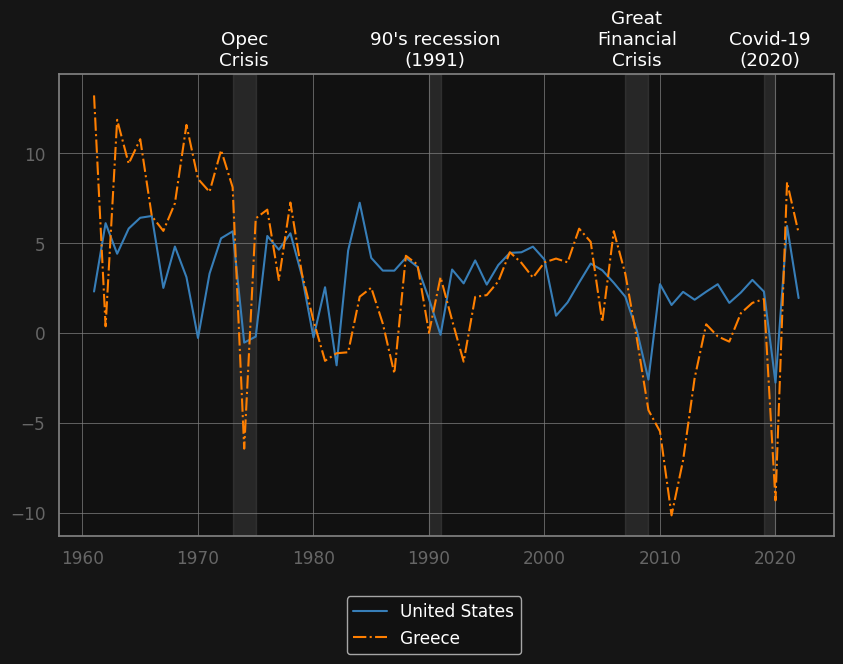

In [6]:
events = [
    {"start": 1973, "end": 1975, "title": "Opec\nCrisis"},
    {"start": 1990, "end": 1991, "title": "90's recession\n(1991)"},
    {"start": 2007, "end": 2009, "title": "Great\nFinancial\nCrisis"},
    {"start": 2019, "end": 2020, "title": "Covid-19\n(2020)"},
]
countries = [
    "United States",
    # "United Kingdom",
    # "Japan",
    "Greece",
]
plot_growth(gdp_growth, countries, events)

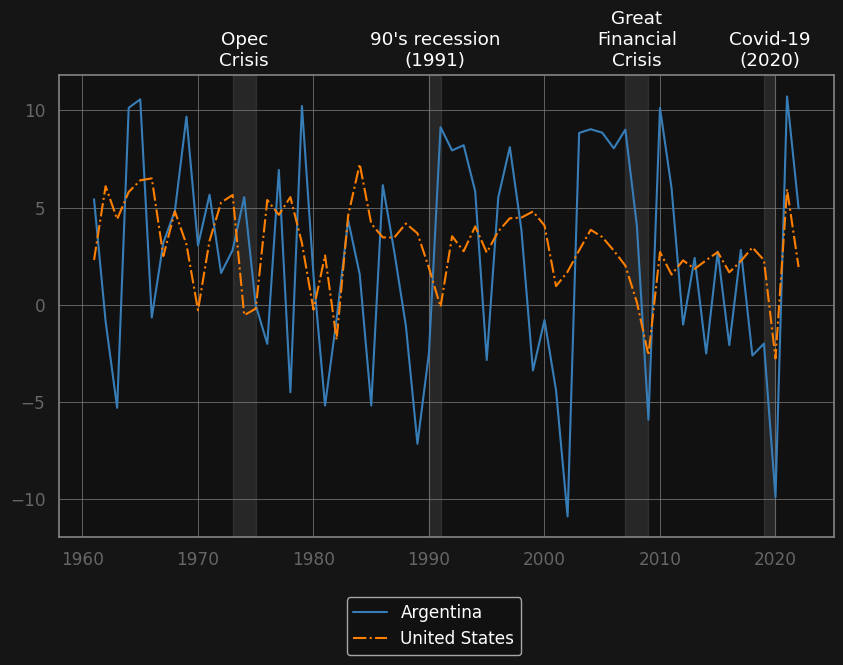

In [7]:
plot_growth(gdp_growth, ["Argentina", "United States"], events)

In [8]:
label = "M0892AUSM156SNBR"
unrate_history = web.DataReader(
    label,
    "fred",
    datetime(1929, 1, 1),
    datetime(1942, 6, 1),
)
unrate_history = unrate_history.rename(columns={label: "UNRATE"})
unrate_history.head()

,UNRATE
DATE,
1929-04-01,0.69
1929-05-01,1.65
1929-06-01,2.06
1929-07-01,0.79
1929-08-01,0.04


In [9]:
unrate_modern = web.DataReader(
    "UNRATE", "fred", datetime(1942, 6, 1), datetime(2022, 12, 31)
)
unrate_modern.head()

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [10]:
unrate_census = pd.DataFrame(
    {
        "DATE": [datetime(year, 6, 1) for year in range(1942, 1948)],
        "UNRATE": [4.7, 1.9, 1.2, 1.9, 3.9, 3.9],
    },
).set_index("DATE")
unrate_census

,UNRATE
DATE,
1942-06-01,4.7
1943-06-01,1.9
1944-06-01,1.2
1945-06-01,1.9
1946-06-01,3.9
1947-06-01,3.9


In [11]:
nber = web.DataReader(
    "USREC", "fred", datetime(1929, 1, 1), datetime(2022, 12, 31)
)
nber[nber["USREC"] != 0]

,USREC
DATE,
1929-09-01,1
1929-10-01,1
1929-11-01,1
1929-12-01,1
1930-01-01,1
...,...
2009-04-01,1
2009-05-01,1
2009-06-01,1


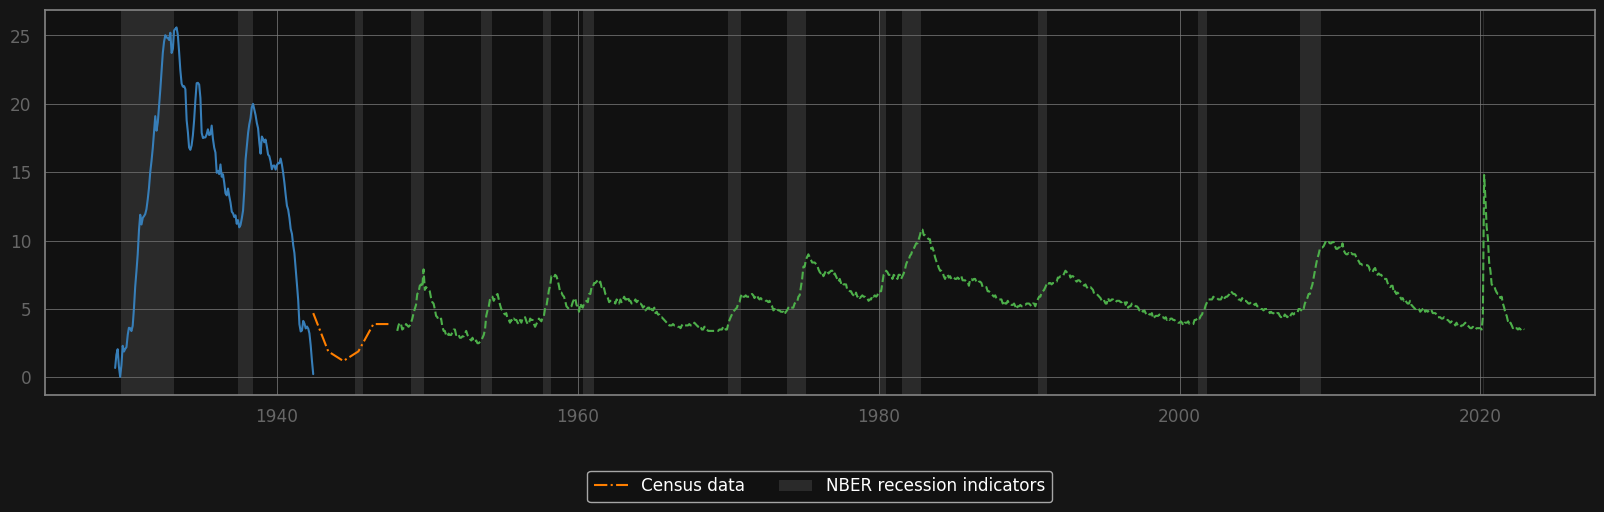

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(unrate_history)
ax.plot(unrate_census, label="Census data")
ax.plot(unrate_modern)
ax.fill_between(
    nber.index,
    0,
    1,
    where=nber["USREC"] == 1,
    color="#666",
    edgecolor="none",
    alpha=0.3,
    transform=ax.get_xaxis_transform(),
    label="NBER recession indicators",
)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=4)
fig.show()